This notebook contains my project for the IBM Data Science specialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA and Data pre-processing

In [2]:
df= pd.read_csv('US_Accidents.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape
df['Severity'].value_counts()
df['TMC'].value_counts()

201.0    2080341
241.0     249852
245.0      40338
229.0      22932
203.0      17639
222.0      13154
244.0      12185
406.0      11109
246.0       7118
343.0       6930
202.0       6298
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        920
341.0        592
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [4]:
df.drop(labels= 'Country', axis=1, inplace= True)

In [5]:
list(df.columns)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

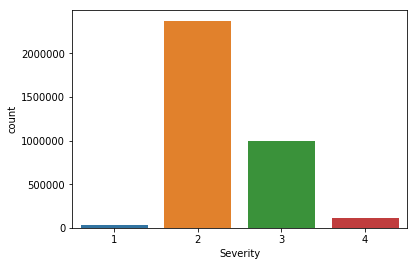

In [6]:
sns.countplot(x= "Severity", data=df)

In [7]:
df_sev= df.pop('Severity')
df['Severity']= df_sev
df.head()

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-1,MapQuest,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,3
1,A-2,MapQuest,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2
2,A-3,MapQuest,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,2
3,A-4,MapQuest,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,3
4,A-5,MapQuest,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,2


In [8]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df.head()

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-1,MapQuest,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,3
1,A-2,MapQuest,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2
2,A-3,MapQuest,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,2
3,A-4,MapQuest,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,3
4,A-5,MapQuest,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,2


In [10]:
#Will use starting lng and lat to encode location so we can use continuous numerical variables

df.drop(labels= ['City', 'County','End_Lat', 'End_Lng'], axis=1, inplace=True)
df.head()

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-1,MapQuest,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,False,False,False,False,False,Night,Night,Night,Night,3
1,A-2,MapQuest,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,False,False,False,False,False,Night,Night,Night,Day,2
2,A-3,MapQuest,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2
3,A-4,MapQuest,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,False,False,False,False,False,Night,Day,Day,Day,3
4,A-5,MapQuest,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2


In [11]:
#We will use Astronomical_Twilight to determine night vs day

df.drop(labels=['ID', 'Source', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight'], axis=1, inplace=True)
df['Astronomical_Twilight'].replace(to_replace= ['Night', 'Day'], value=[0, 1], inplace=True)
df.head()

,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Astronomical_Twilight,Severity
0,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,...,False,False,False,False,False,False,False,False,0.0,3
1,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,...,False,False,False,False,False,False,False,False,1.0,2
2,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,...,False,False,False,False,False,False,True,False,1.0,2
3,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,...,False,False,False,False,False,False,False,False,1.0,3
4,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,True,False,1.0,2


In [12]:
df['Duration']= df['End_Time']- df['Start_Time']
df['Duration']= df['Duration']/ np.timedelta64(1, 's')
df.head()


,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Astronomical_Twilight,Severity,Duration
0,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,...,False,False,False,False,False,False,False,0.0,3,18840.0
1,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,...,False,False,False,False,False,False,False,1.0,2,1800.0
2,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,...,False,False,False,False,False,True,False,1.0,2,1800.0
3,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,...,False,False,False,False,False,False,False,1.0,3,1800.0
4,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,...,False,False,False,False,False,True,False,1.0,2,1800.0


In [13]:
df.drop(labels= ['Description', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Turning_Loop'], axis=1, inplace=True)
df.head()

,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,Street,Side,Weather_Timestamp,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Severity,Duration
0,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,NaN,I-70 E,R,2016-02-08 05:58:00,...,False,False,False,False,False,False,False,0.0,3,18840.0
1,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,2584.0,Brice Rd,L,2016-02-08 05:51:00,...,False,False,False,False,False,False,False,1.0,2,1800.0
2,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,NaN,State Route 32,R,2016-02-08 06:56:00,...,False,False,False,False,False,False,True,1.0,2,1800.0
3,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,NaN,I-75 S,R,2016-02-08 07:38:00,...,False,False,False,False,False,False,False,1.0,3,1800.0
4,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,NaN,Miamisburg Centerville Rd,R,2016-02-08 07:53:00,...,False,False,False,False,False,False,True,1.0,2,1800.0


In [14]:
df.dtypes

TMC                             float64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Number                          float64
Street                           object
Side                             object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool
Junction                           bool
No_Exit                            bool


In [15]:
df['Weather_Condition'] = df['Weather_Condition'].astype(str)
df.dtypes

TMC                             float64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Number                          float64
Street                           object
Side                             object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool
Junction                           bool
No_Exit                            bool


In [16]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['TMC', 'Number', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Astronomical_Twilight']


In [17]:
df['Astronomical_Twilight']= df['Astronomical_Twilight'].astype(bool)
df['Astronomical_Twilight'].fillna(1)

0          False
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
3513587     True
3513588     True
3513589     True
3513590     True
3513591     True
3513592     True
3513593     True
3513594     True
3513595     True
3513596     True
3513597     True
3513598     True
3513599     True
3513600     True
3513601     True
3513602     True
3513603     True
3513604     True
3513605     True
3513606     True
3513607     True
3513608     True
3513609     True
3513610     True
3513611     True
3513612     True
3513613     True
3513614     Tr

In [18]:
df.drop(labels=['Weather_Timestamp', 'Wind_Direction'], axis=1, inplace=True)

In [19]:
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace= True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(), inplace= True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace= True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace= True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace= True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace= True)
df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean(), inplace= True)
df.head()


,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,Street,Side,Temperature(F),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Severity,Duration
0,201.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,NaN,I-70 E,R,36.9,...,False,False,False,False,False,False,False,False,3,18840.0
1,201.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,2584.0,Brice Rd,L,37.9,...,False,False,False,False,False,False,False,True,2,1800.0
2,201.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,NaN,State Route 32,R,36.0,...,False,False,False,False,False,False,True,True,2,1800.0
3,201.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,NaN,I-75 S,R,35.1,...,False,False,False,False,False,False,False,True,3,1800.0
4,201.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,NaN,Miamisburg Centerville Rd,R,36.0,...,False,False,False,False,False,False,True,True,2,1800.0


In [20]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['TMC', 'Number']


In [21]:
df.drop(labels=['TMC', 'Distance(mi)'], axis=1, inplace = True)
df_sev= df.pop('Severity')
df['Severity']= df_sev
df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,Number,Street,Side,Temperature(F),Wind_Chill(F),Humidity(%),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Duration,Severity
0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,I-70 E,R,36.9,53.557295,91.0,...,False,False,False,False,False,False,False,False,18840.0,3
1,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,2584.0,Brice Rd,L,37.9,53.557295,100.0,...,False,False,False,False,False,False,False,True,1800.0,2
2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,State Route 32,R,36.0,33.300000,100.0,...,False,False,False,False,False,False,True,True,1800.0,2
3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,I-75 S,R,35.1,31.000000,96.0,...,False,False,False,False,False,False,False,True,1800.0,3
4,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,Miamisburg Centerville Rd,R,36.0,33.300000,89.0,...,False,False,False,False,False,False,True,True,1800.0,2


In [22]:
df.drop(labels=['Start_Time', 'End_Time', 'Number', 'Street'], axis=1, inplace= True)
df.head()

,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Duration,Severity
0,39.865147,-84.058723,R,36.9,53.557295,91.0,29.68,10.0,8.219025,0.020000,...,False,False,False,False,False,False,False,False,18840.0,3
1,39.928059,-82.831184,L,37.9,53.557295,100.0,29.65,10.0,8.219025,0.000000,...,False,False,False,False,False,False,False,True,1800.0,2
2,39.063148,-84.032608,R,36.0,33.300000,100.0,29.67,10.0,3.500000,0.015983,...,False,False,False,False,False,False,True,True,1800.0,2
3,39.747753,-84.205582,R,35.1,31.000000,96.0,29.64,9.0,4.600000,0.015983,...,False,False,False,False,False,False,False,True,1800.0,3
4,39.627781,-84.188354,R,36.0,33.300000,89.0,29.65,6.0,3.500000,0.015983,...,False,False,False,False,False,False,True,True,1800.0,2


In [23]:
df['Side'] = df['Side'].astype('bool')
df.head()

,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Duration,Severity
0,39.865147,-84.058723,True,36.9,53.557295,91.0,29.68,10.0,8.219025,0.020000,...,False,False,False,False,False,False,False,False,18840.0,3
1,39.928059,-82.831184,True,37.9,53.557295,100.0,29.65,10.0,8.219025,0.000000,...,False,False,False,False,False,False,False,True,1800.0,2
2,39.063148,-84.032608,True,36.0,33.300000,100.0,29.67,10.0,3.500000,0.015983,...,False,False,False,False,False,False,True,True,1800.0,2
3,39.747753,-84.205582,True,35.1,31.000000,96.0,29.64,9.0,4.600000,0.015983,...,False,False,False,False,False,False,False,True,1800.0,3
4,39.627781,-84.188354,True,36.0,33.300000,89.0,29.65,6.0,3.500000,0.015983,...,False,False,False,False,False,False,True,True,1800.0,2


In [24]:
df.drop(labels=['Weather_Condition'], axis=1, inplace = True)

In [25]:
df.describe(include='all')

,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Duration,Severity
count,3.513617e+06,3.513617e+06,3513617,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,...,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3.513617e+06,3.513617e+06
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,NaN,NaN
top,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,NaN,NaN
freq,NaN,NaN,3513617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3509233,3482442,3513433,3443296,3461641,3512216,2889994,3075116,NaN,NaN
mean,3.654195e+01,-9.579151e+01,NaN,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.919101e+03,2.339929e+00
std,4.883520e+00,1.736877e+01,NaN,1.844605e+01,1.626838e+01,2.252879e+01,8.253333e-01,2.854558e+00,4.910592e+00,1.254737e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.028237e+05,5.521935e-01
min,2.455527e+01,-1.246238e+02,NaN,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.045000e+03,1.000000e+00
25%,3.363784e+01,-1.174418e+02,NaN,5.000000e+01,5.355730e+01,4.900000e+01,2.974000e+01,1.000000e+01,5.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.784000e+03,2.000000e+00
50%,3.591687e+01,-9.102601e+01,NaN,6.300000e+01,5.355730e+01,6.700000e+01,2.995000e+01,1.000000e+01,8.100000e+00,1.598256e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.680000e+03,2.000000e+00
75%,4.032217e+01,-8.093299e+01,NaN,7.570000e+01,5.400000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.040000e+01,1.598256e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.498000e+03,3.000000e+00


In [26]:
df.drop(labels= ['Duration'], axis=1, inplace= True)

In [69]:
geo_df.dtypes

Start_Lat                 float64
Start_Lng                 float64
Side                         bool
Temperature(F)            float64
Wind_Chill(F)             float64
Humidity(%)               float64
Pressure(in)              float64
Visibility(mi)            float64
Wind_Speed(mph)           float64
Precipitation(in)         float64
Amenity                      bool
Bump                         bool
Crossing                     bool
Give_Way                     bool
Junction                     bool
No_Exit                      bool
Railway                      bool
Roundabout                   bool
Station                      bool
Stop                         bool
Traffic_Calming              bool
Traffic_Signal               bool
Astronomical_Twilight        bool
Severity                    int64
geometry                 geometry
dtype: object

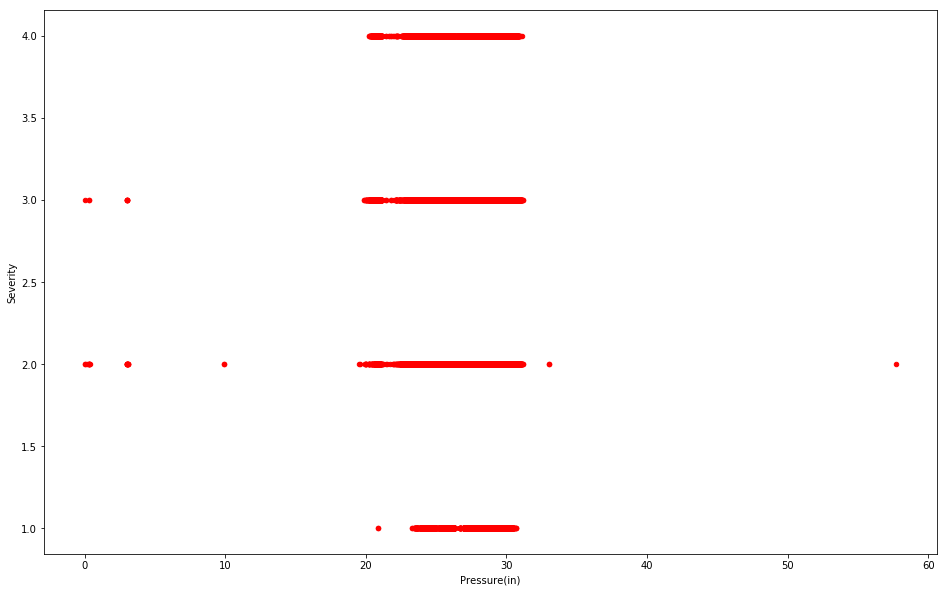

In [47]:
df.plot(kind='scatter', x='Pressure(in)', y='Severity', color='red')
plt.show()

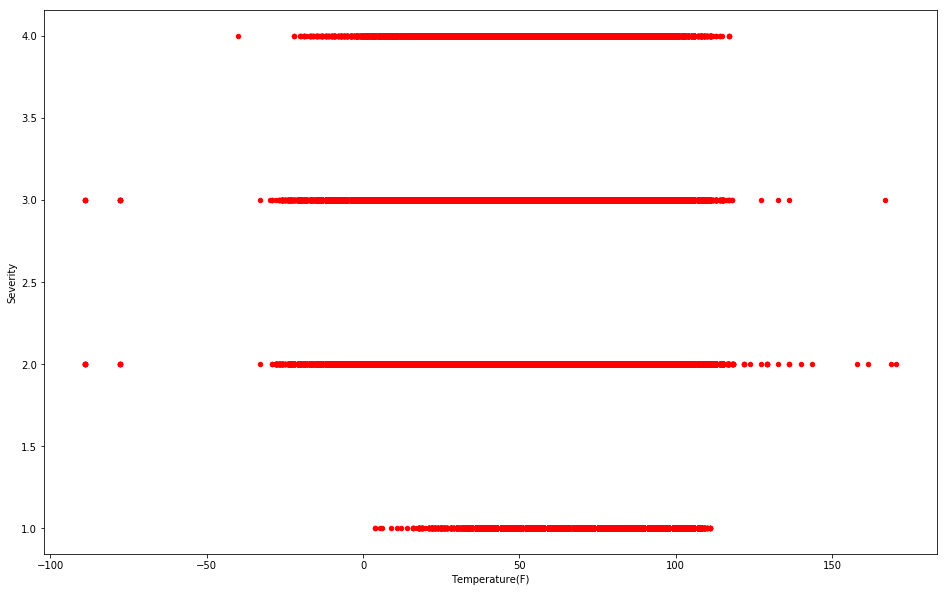

In [51]:
df.plot(kind='scatter', x='Temperature(F)', y='Severity', color='red')
plt.show()


In [56]:
! pip install geopandas
! pip install descartes

import geopandas as gpd
import descartes 
from shapely.geometry import Point, Polygon

%matplotlib inline


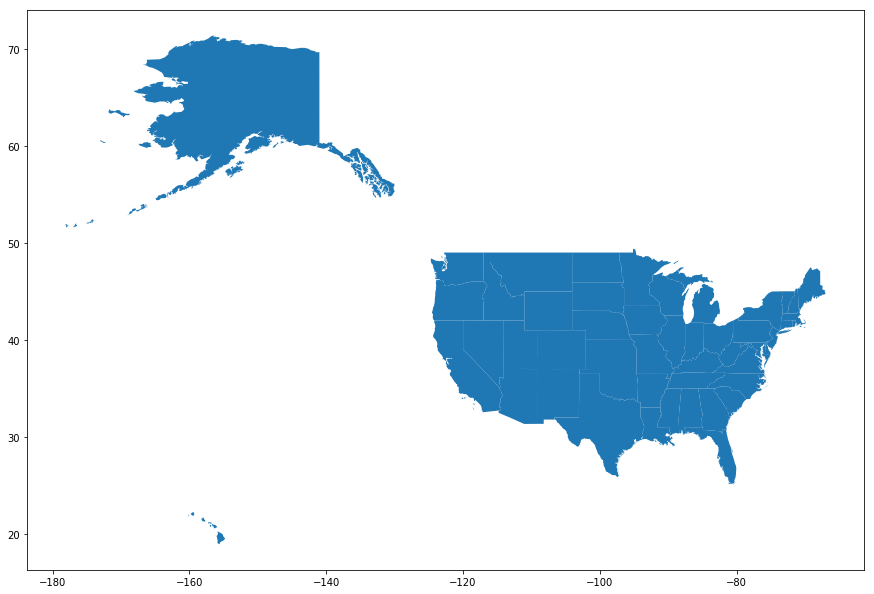

In [59]:
usa = gpd.read_file('states_21basic/states.shp')
fig, ax = plt.subplots(figsize= [15, 15])
usa.plot(ax= ax)

In [64]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
crs = "EPSG:4326"
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

/Users/danielsprague/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/danielsprague/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/danielsprague/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/danielsprague/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


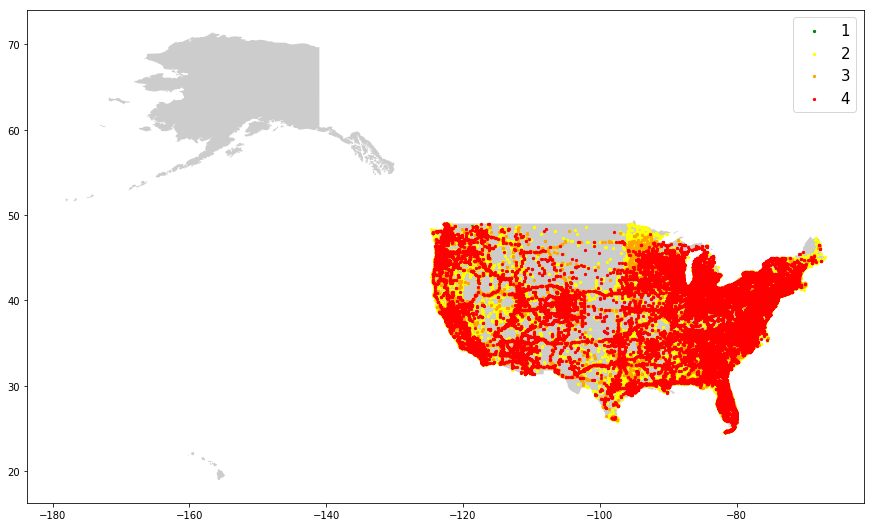

In [71]:
fix, ax = plt.subplots(figsize = [15, 15])
usa.plot(ax=ax, alpha = 0.4, color= 'grey')
geo_df[geo_df['Severity'] == 1].plot('Severity', ax= ax, markersize = 5, color = 'green', marker= 'o', label= '1')
geo_df[geo_df['Severity'] == 2].plot('Severity', ax= ax, markersize = 5, color = 'yellow', marker= 'o', label= '2')
geo_df[geo_df['Severity'] == 3].plot('Severity', ax= ax, markersize = 5, color = 'orange', marker= 'o', label= '3')
geo_df[geo_df['Severity'] == 4].plot('Severity', ax= ax, markersize = 5, color = 'red', marker= 'o', label= '4')
plt.legend(prop= {'size':15})

In [66]:
x = geo_df[geo_df['Severity'] == 1]
x.head()

,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight,Severity,geometry
163,41.395805,-81.935562,True,33.1,27.700000,82.0,29.95,7.0,5.800000,0.015983,...,False,False,False,False,False,False,False,True,1,POINT (-81.93556 41.39580)
374,40.018669,-81.565704,True,46.0,40.600000,86.0,29.46,7.0,11.500000,0.080000,...,False,False,False,False,False,False,False,True,1,POINT (-81.56570 40.01867)
960,37.750488,-121.379982,True,66.0,53.557295,42.0,29.94,10.0,6.900000,0.015983,...,False,False,False,False,False,False,False,False,1,POINT (-121.37998 37.75049)
1390,36.831322,-121.435173,True,71.6,53.557295,50.0,30.02,10.0,8.219025,0.015983,...,False,False,False,False,False,False,False,True,1,POINT (-121.43517 36.83132)
7851,38.454693,-120.867790,True,55.4,53.557295,38.0,30.33,10.0,8.219025,0.015983,...,False,False,False,False,False,False,True,True,1,POINT (-120.86779 38.45469)


### Modeling

I will be using a random forest model because it can take into account both categorical and continuous variables,
can easily yield results on variable importance, and is generally very effective with many attributes

In [28]:
df['Severity'].value_counts()

2    2373210
3     998913
4     112320
1      29174
Name: Severity, dtype: int64

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

In [30]:
#split into train, validation, and test sets
X= df.iloc[:, :-1]
y= df.iloc[:, -1]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)

In [31]:
#undersample data due to class imbalance
usamp = RandomUnderSampler()
us_X_train, us_y_train= usamp.fit_sample(X_train, y_train)

In [32]:
us_X_train = pd.DataFrame(data= us_X_train, columns= X_train.columns)
us_X_train.head()

,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Astronomical_Twilight
0,32.1866,-110.968,True,103,103,9,27.09,10,14,0,...,False,False,False,False,False,False,False,False,True,True
1,33.6627,-112.117,True,81,81,23,28.16,10,5,0,...,False,False,False,False,False,False,False,False,True,True
2,33.5378,-112.229,True,63,63,47,28.88,10,0,0,...,False,False,False,False,False,False,True,False,False,False
3,37.8842,-122.554,True,54,54,100,29.83,4,0,0,...,False,False,False,False,False,False,True,False,False,True
4,33.5476,-86.6326,True,67,67,79,29.24,10,10,0,...,False,False,False,False,False,False,False,False,False,True


In [33]:
def RunRF(us_X_train, us_y_train, X_test, y_test):
    n= [1, 10, 100, 1000]
    bestscore=0
    bestn= 1
    for i in range(len(n)):
        clf= RandomForestClassifier(n_estimators= n[i])
        clf.fit(us_X_train, us_y_train)
        if clf.score(X_val, y_val) > bestscore:
            bestscore= clf.score(X_val, y_val)
            bestn= n[i]
            
    bestclf= RandomForestClassifier(n_estimators= n)
    clf.fit(us_X_train, us_y_train)
    
    print('Best number of estimators= '+str(bestn))
    
    scores= cross_val_score(clf, us_X_train, us_y_train, cv=3, scoring='accuracy')
    print('Training accuracy= '+str(scores.mean()))
    print('Training standard deviation= '+ str(np.std(scores)))
    clf.score(X_test, y_test)
    print('Testing accuracy= '+str(clf.score(X_test, y_test)))
        
    return clf

SyntaxError: invalid syntax (<ipython-input-128-cb3f79a312eb>, line 1)

In [34]:
clf= RunRF(us_X_train, us_y_train, X_test, y_test)


Best number of estimators= 1000
Training accuracy= 0.6211987109749115
Training standard deviation= 0.001141103089298761
Testing accuracy= 0.5234672503002601


In [35]:
def plot_confusion(x, y, clf):
    names = ['1', '2', '3', '4']
    conf = confusion_matrix(pd.DataFrame(y), pd.DataFrame(clf.predict(x)))
    print(conf)
    conf = conf.astype('float')/ conf.sum(axis=1)[:, np.newaxis] 
    plt.imshow(conf, interpolation='nearest', cmap=plt.get_cmap('Greens')) 
    marks = np.arange(len(names))
    for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
        plt.text(j, i, "{}%".format(round(conf[i, j]*100,2)), horizontalalignment="center") 
    plt.xticks(marks, names)
    plt.yticks(marks, names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [36]:
def var_import(cols, clf):
    importance = pd.DataFrame({'feature': list(cols), 'feature_importance': [round(i, 4) for i in list(clf.feature_importances_)]})
    importance = importance.sort_values(by=['feature_importance'], ascending=False)
    importance = importance.set_index('feature')
    return importance

In [37]:
def plot_importance(importance):
    plt.rcParams['figure.figsize']= [16, 10]
    ax = plt.bar(importance.index, importance['feature_importance'])
    plt.xticks( rotation='vertical')
    plt.xlabel('Variable')
    plt.ylabel('Feature Importance')
    plt.show()

[[  5697     45     37     43]
 [ 52965 238897 107795  74816]
 [ 13097  36016 107415  43434]
 [  1226   2238   3159  15844]]


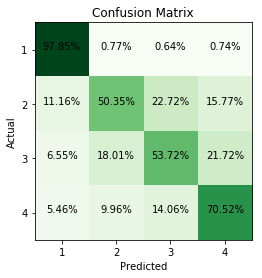

In [38]:
plot_confusion(X_test, y_test, clf)


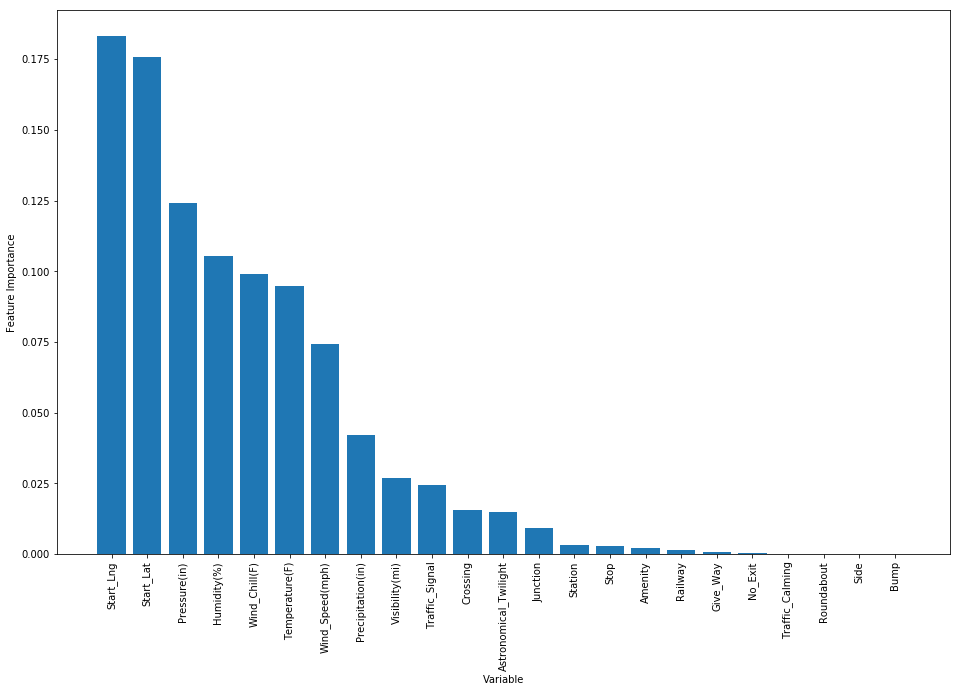

In [39]:
plot_importance(var_import(X_test.columns, clf))